<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *6*: *Regression***

###**Tenggat Waktu: 24 November 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab1_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **24 November 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Fahira Adindiah"
KELAS = "C"
NPM = "2106751575"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Fahira Adindiah dari kelas C dengan NPM 2106751575, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Fahira Adindiah)


## Intro to Linear Models for Regression and Classification

### Linear Regression

Linear regression adalah teknik pencarian nilai-nilai parameter suatu persamaan linear yang cocok dengan data. Persamaan linear yang cocok adalah persamaan yang memiliki perbedaan hasil prediksi dan aktual minimal.

Contoh persamaan linear

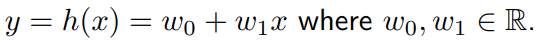

Persamaan di atas adalah fungsi yang memetakan **X** ke **Y** (anggap Y = h(x)), dengan:
- w0 adalah intersep
- w1 adalah koefisien
- x adalah nilai independen
- y adalah nilai dependen

Tentunya, persamaan ini bisa digeneralisasikan untuk banyak nilai x (fitur lebih dari 1) untuk menentukan nilai y. Berikut adalah persamaannya.

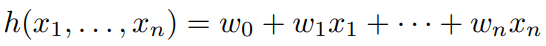

atau

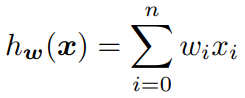

Nilai-nilai parameter seperti w0, w1, w2, wn, dst. inilah yang dicari untuk mendapatkan persamaan/fungsi yang cocok dengan data pada linear regression.

Pencarian didasarkan pada peminimalan error/residual dengan meminimal kan fungsi loss linear regression. J(w) di bawah ini adalah contoh fungsi loss linear regression.

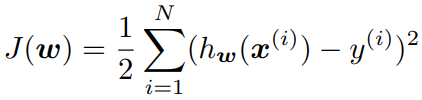

Proses peminimalan fungsi loss disebut dengan gradient descent yang bisa Anda pelajari lebih lanjut dari slide kuliah. :)

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Linear Regression dengan Scikit-learn**

Scikit-learn memiliki modul LinearRegression untuk membuat model linear regression. Di bawah ini adalah contoh implementasinya.

Pada percobaan kali ini, kita akan menggunakan data buatan yang terdiri dari 1 variabel dan 1 target. Hubungan antara variabel dan target dipenuhi oleh fungsi `y = 1+2X`. Nilai-nilai 1 dan 2, secara berurutan dapat dianggap sebagai nilai w0 dan w1.

In [3]:
import numpy as np

# Membuat data buatan dengan beberapa noises yang disengaja

X = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 1])
X_train  = X.reshape(-1, 1)
y_train  = np.array([5, 7, 5, 9, 10, 4, 3, 11, 11,  2])

print('X: ', X_train)
print('y: ', y_train)

X:  [[2]
 [3]
 [2]
 [4]
 [5]
 [2]
 [1]
 [5]
 [5]
 [1]]
y:  [ 5  7  5  9 10  4  3 11 11  2]


In [4]:
# Melatih model linear regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Pada tahap ini, trained model 'linear' telah mengandung informasi (parameter-parameter) yang memenuhi suatu persamaan linear. Hal tersebut dapat kita lihat dengan cara di bawah ini.

In [5]:
# Melihat nilai koefisien dan intersep persamaan linear regression pada trained model
print("Koefisien persamaan linear: \n", linear.coef_)
print("Intersep persamaan linear: \n", linear.intercept_)

Koefisien persamaan linear: 
 [2.04166667]
Intersep persamaan linear: 
 0.5749999999999993


Berdasarkan persamaan linear tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

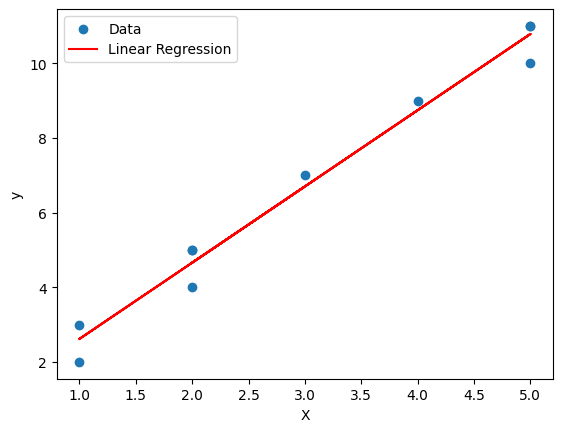

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = linear.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='red', label="Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [7]:
# Melakukan percobaan prediksi model linear regression menggunakan data testing buatan

X_test = np.array([[2], [4], [7]])
y_test = np.array([5, 9, 15])

y_predict = linear.predict(X_test)

print(y_predict)

[ 4.65833333  8.74166667 14.86666667]


Hasil prediksi (y_predict) memiliki nilai yang hampir mirip dengan nilai y yang sebenarnya (y_test). Hal ini menandakan model memiliki performa yang baik.

Performa model regresi dapat diukur dengan beberapa metrik evaluasi, contohnya adalah R-squared. Lihat kode di bawah ini.

In [8]:
from sklearn import metrics

# Nilai R-squared
print("R-squared:", metrics.r2_score(y_test, y_predict))

R-squared: 0.9960279605263158


Dari hasil di atas, dapat diketahui bahwa perbedaan antara prediksi dan aktual memiliki nilai yang kecil. Untuk implementasi Linear Regression lebih lanjutnya menggunakan **sklearn** dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

### Ridge and Lasso Regression

Linear regression adalah model yang memiliki ciri high-bias dan low-variance. Biasanya, model seperti ini cenderung tidak overfit. Walau demikian, linear regression masih dapat mengalami overfitting, apalagi pada data yang memiliki banyak fitur (high-dimension).

Untuk mengatasi hal tersebut, diperlukan regularisasi. Pada linear regression, regularisasi adalah teknik untuk meminimalkan fungsi loss dengan penambahan regularization term pada fungsi loss. Dua teknik regularisasi pada linear regression adalah Ridge dan Lasso. Berikut adalah modifikasi fungsi loss linear regression pada ridge dan lasso regression.

- Ridge regression

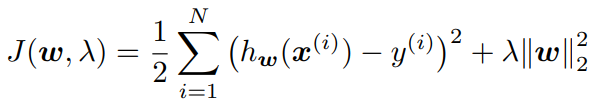

- Lasso Regression

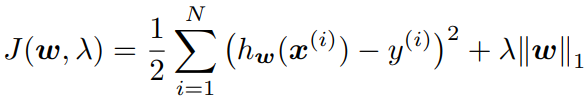

Term tambahan pada fungsi loss tersebut berperan seperti bobot pinalti untuk meminimalkan overfitting. Pada regularization term terdapat parameter λ yang pada sumber lain disebut sebagai α (alpha).

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

**Ridge dan Lasso Regression dengan Scikit-learn**

Berikut adalah contoh implementasi ridge dan lasso regression menggunakan modul scikit-learn pada dataset housing.

In [9]:
# Melatih model ridge regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2) # Mengatur hyperparameter alpha=2
ridge.fit(X_train, y_train)

Ridge(alpha=2)

Setelah pelatihan selesai, **ridge** memiliki parameter hasil generalisasi ridge regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [10]:
# Melihat nilai koefisien dan intersep persamaan ridge regression pada trained model

print("Koefisien persamaan regresi ridge: \n", ridge.coef_)
print("Intersep persamaan regresi ridge: \n", ridge.intercept_)

Koefisien persamaan regresi ridge: 
 [1.88461538]
Intersep persamaan regresi ridge: 
 1.046153846153846


Berdasarkan persamaan linear pada **ridge** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

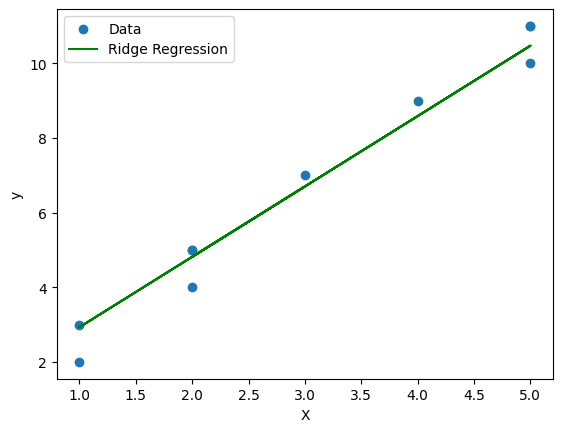

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = ridge.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='green', label="Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Untuk **lasso** regression, berikut adalah contoh implementasinya.

In [12]:
# Melatih model lasso regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=2) # Mengatur hyperparameter alpha=2
lasso.fit(X_train, y_train)

Lasso(alpha=2)

Setelah pelatihan selesai, **lasso** memiliki parameter hasil generalisasi lasso regression dengan memanfaatkan bobot penalti. Parameter yang diperoleh dapat dilihat pada kode berikut ini.

In [13]:
# Melihat nilai koefisien dan intersep persamaan lasso regression pada trained model

print("Koefisien persamaan regresi lasso: \n", lasso.coef_)
print("Intersep persamaan regresi lasso: \n", lasso.intercept_)

Koefisien persamaan regresi lasso: 
 [1.20833333]
Intersep persamaan regresi lasso: 
 3.075


Berdasarkan persamaan linear pada **lasso** regression tersebut, kita dapat membuat visualisasi linear hyperplane sederhana.

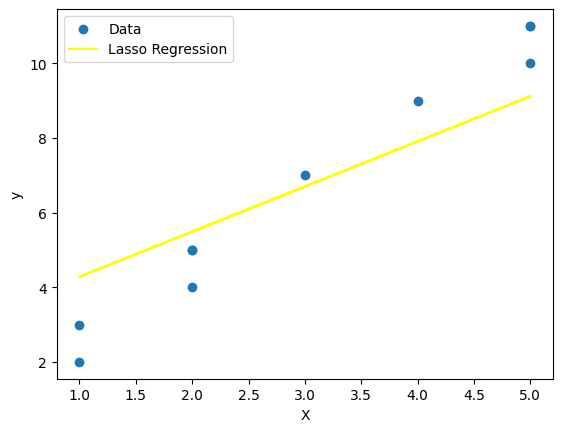

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

Perhatikan plot visualisasi pada ketiga plot berikut ini. Seperti yang sudah disebutkan sebelumnya, model regresi linear memiliki kecenderungan untuk tidak overfit. Untuk itu, penerapan regularisasi melalui bobot penalti tidak memperbaik kinerja dari model pada konteks data sederhana yang kita bentuk.

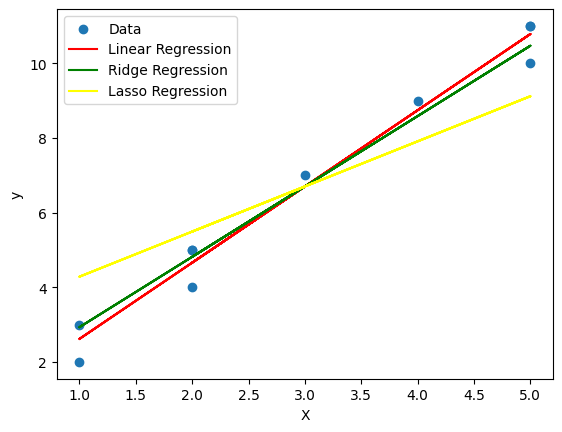

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X, y_train, label="Data")
y_pred_linear = linear.predict(X_train)
y_pred_ridge = ridge.predict(X_train)
y_pred_lasso = lasso.predict(X_train)

# Plot hyperplane
plt.plot(X, y_pred_linear, color='red', label="Linear Regression")
plt.plot(X, y_pred_ridge, color='green', label="Ridge Regression")
plt.plot(X, y_pred_lasso, color='yellow', label="Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

# Show the plot
plt.show()

**NOTE**: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

Anda dipersilakan untuk mencoba sendiri memprediksi dan mengukur performa model ridge dan lasso regression. Performa mungkin tidak akan jauh berbeda dengan linear regression karena hanya mengunakan data yang sangat kecil. Untuk implementasi lebih lanjutnya menggunakan **sklearn** dapat dilihat pada kedua link berikut:
* [Lasso Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html).
* [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

### Penjelasan Dataset untuk *Linear Regression*, *Lasso Regression*, dan *Ridge Regression*

Dataset yang digunakan pada bagian linear regression, lasso regression, dan ridge regression adalah data harga dan atribut dari sekitar 54000 berlian. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Price:** Harga berlian dalam satuan dolar AS (\$326 — \$18,823)

- **Carat:** Berat/Bobot berlian (0.2 — 5.01)

- **Cut:** Kualitas potongan berlian (Fair, Good, Very Good, Premium, Ideal)

- **Color:** Kualitas warna berlian, dari J (paling buruk) hingga D (paling baik)

- **Clarity:** Ukuran seberapa jernih berlian (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (paling baik))

- **X:** Ukuran panjang berlian dalam satuan mm (0 — 10.74)

- **Y:** Ukuran lebar berlian dalam satuan mm (0 — 58.9)

- **Z:** Ukuran kedalaman berlian dalam satuan mm (0 — 31.8)

- **Depth:** Persentase total dari kedalaman berlian =  100 * z / mean(x, y)  (43 — 79)

- **Table:** Lebar bagian atas berlian relatif terhadap titik terlebar (43 — 95)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/shivam2503/diamonds
<br/> <br/>
<img src="https://yourdiamondguru.com/wp-content/uploads/2018/09/GIA-Cut-Scale.png" alt="Struktur Berlian"/>

In [16]:
# Import dataset diamonds dan menampilkan 5 row teratas
import pandas as pd

df_diamond = pd.read_csv('diamonds.csv')
df_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
# Menampilkan informasi keseluruhan terkait dataset
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### Soal 1: Data Preprocessing untuk Regresi

a) Persiapkan data untuk dilatih oleh model regresi.
Pada tahap ini, Anda diminta melakukan persiapan sebelum melakukan training pada model. Berikut adalah persiapan yang `setidaknya` dilakukan sebagai berikut:
- Melakukan encoding pada data kategorikal
- Melakukan feature selection, pilih fitur-fitur yang relevan dalam memprediksi harga berlian (`price`)
- Membagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.
- Melakukan standarisasi pada data selain data kategorikal. Hint: Standarisasi dilatih terlebih dahulu pada data training, lalu lakukan standarisasi untuk kedua training dan testing set.

In [18]:
df_diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [19]:
# Melihat deskripsi statistik dari kelompok fitur kategorikal
display(df_diamond.describe(include=['object', 'boolean']))

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [20]:
# Melihat jumlah missing values
df_diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [21]:
# Melihat jumlah duplikasi data
print('Jumlah duplikasi pada data adalah', df_diamond.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 289


In [22]:
# Menangani duplikasi data
df_diamond.drop_duplicates(keep='first', inplace=True)
print('Jumlah duplikasi pada data adalah', df_diamond.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


In [23]:
# Kolom dengan data kategorikal
cat_cols = df_diamond.select_dtypes(include=['object', 'boolean']).columns

In [24]:
from sklearn.calibration import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
  df_diamond[col] = le.fit_transform(df_diamond[col])

df_diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [25]:
# Melihat jumlah kemungkinan adanya outliers pada data menggunakan IQR

# Menghitung quartil 1 dan 3
Q1 = df_diamond.quantile(0.25)
Q3 = df_diamond.quantile(0.75)

# Menghitung RUB dan RLB
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut
outliers = (df_diamond < lower_limit) | (df_diamond > upper_limit)
print ("Outlier pada tiap atribut:")
print(outliers.sum())

Outlier pada tiap atribut:
carat      1873
cut        1598
color         0
clarity       0
depth      2525
table       604
price      3523
x            31
y            28
z            48
dtype: int64


In [26]:
# Menghapus outliers
df_cleaned = df_diamond[~((df_diamond <= lower_limit) | (df_diamond >= upper_limit)).any(axis=1)].reset_index(drop=True)

print(df_cleaned.shape)

(47048, 10)


In [27]:
X = df_cleaned.drop(['price', 'x', 'y', 'z'], axis=1)
y = df_cleaned['price']

#### Soal 2: Linear Regression

a) Buatlah sebuah model regresi linear berdasarkan fitur-fitur yang terpilih sebelumnya dengan `price` sebagai target prediksi. Tampilkan hasil prediksinya pada keseluruhan data uji.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)

In [29]:
# Membangun model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_linreg_predict = linreg.predict(X_test)

b) Visualisasikan kinerja model regresi linear yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

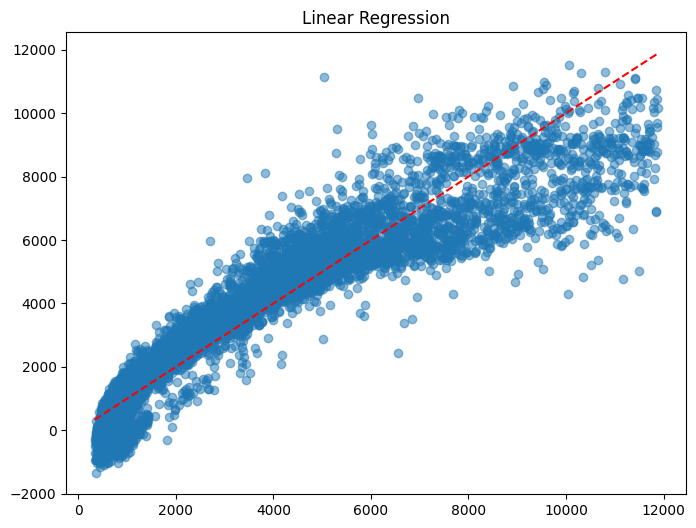

In [30]:
plt.figure(figsize=(8, 6))
plt.title('Linear Regression')
plt.scatter(y_test, y_linreg_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

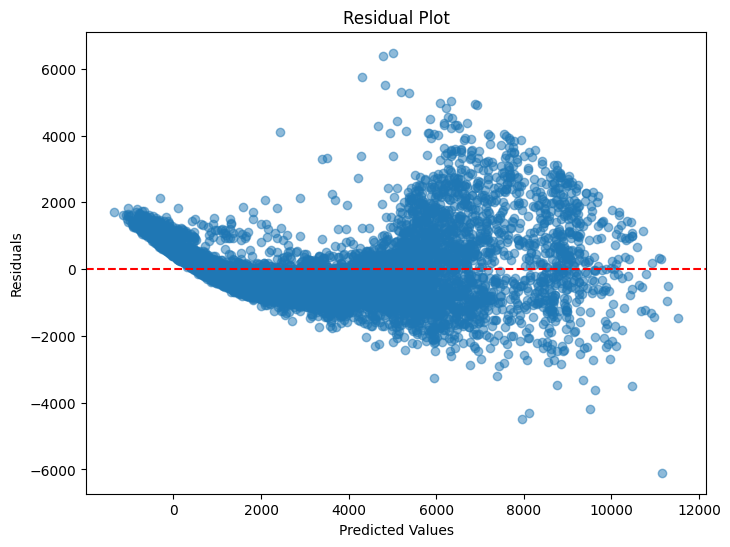

In [31]:
residuals = y_test - y_linreg_predict
plt.figure(figsize=(8, 6))
plt.scatter(y_linreg_predict, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

c) Tampilkan nilai dari R squared yang dihasilkan dengan menggunakan **cross validation** untuk mendapatkan performa kinerja sebenarnya menggunakan data latih yang ada.

> Catatan: Jumlah split dibebaskan.

In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(linreg, X_train, y_train, cv=5, scoring='r2')

print("R-squared scores for each split:")
for i, score in enumerate(cv_scores):
    print(f"Split {i + 1}: {score}")

R-squared scores for each split:
Split 1: 0.8815073720611515
Split 2: 0.8870075071517738
Split 3: 0.8824403674332207
Split 4: 0.8840264077512104
Split 5: 0.8820860557651187


#### Soal 3: Lasso Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [33]:
alpha = [1, 5, 10, 15, 20]

b) Buatlah (fit) model regresi lasso berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [34]:
lasso_model = []

for a in alpha:
  lasreg = Lasso()
  lasreg.set_params(**{'alpha': a})
  lasreg.fit(X_train, y_train)
  lasso_model.append(lasreg)

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model lasso regression pada testing set

In [35]:
from sklearn import metrics

list_mae = []
list_mse = []
list_rmse = []
list_r_squared = []

for model in lasso_model:
    y_predict = model.predict(X_test)
    
    # Menghitung nilai metrik evaluasi: MAE, MSE, RMSE, R-squared
    mae = metrics.mean_absolute_error(y_test, y_predict)
    mse = metrics.mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    r_squared = metrics.r2_score(y_test, y_predict)
    
    # Menambahkan nilai metrik evaluasi ke dalam list
    list_mae.append(mae)
    list_mse.append(mse)
    list_rmse.append(rmse)
    list_r_squared.append(r_squared)

for i, a in enumerate(alpha):
    print(f"Metrics for Lasso Regression with alpha={a}")
    print(f"R-squared: {list_r_squared[i]}")
    print(f"MAE: {list_mae[i]}")
    print(f"MSE: {list_mse[i]}")
    print(f"RMSE: {list_rmse[i]}\n")


Metrics for Lasso Regression with alpha=1
R-squared: 0.8872024408468248
MAE: 648.4830841054807
MSE: 842140.4865094174
RMSE: 917.6821271602806

Metrics for Lasso Regression with alpha=5
R-squared: 0.8872500131384287
MAE: 645.9582271270855
MSE: 841785.3143488102
RMSE: 917.4885908548456

Metrics for Lasso Regression with alpha=10
R-squared: 0.887232180340443
MAE: 643.0700624896948
MSE: 841918.4530557478
RMSE: 917.5611440420457

Metrics for Lasso Regression with alpha=15
R-squared: 0.8871344719700446
MAE: 640.4330149415716
MSE: 842647.9384737054
RMSE: 917.9585712186065

Metrics for Lasso Regression with alpha=20
R-squared: 0.8869465372744674
MAE: 638.0713459379268
MSE: 844051.0487639771
RMSE: 918.7225091201244



d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [36]:
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

Lasso(alpha=1)

e) Tampilkan array hasil prediksi dari model regresi lasso yang terpilih pada keseluruhan data uji.

In [37]:
y_best_predict = lasso.predict(X_test)
y_best_predict

array([ 272.81066788, 5314.9744335 , 6925.32689536, ..., 2241.67267789,
       5094.88943373, 1791.37019894])

In [38]:
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)

In [39]:
print("R-squared training:", train_score)
print("R-squred testing:", test_score)

R-squared training: 0.8834878003719338
R-squred testing: 0.8872024408468248


f)  Visualisasikan kinerja model regresi lasso yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

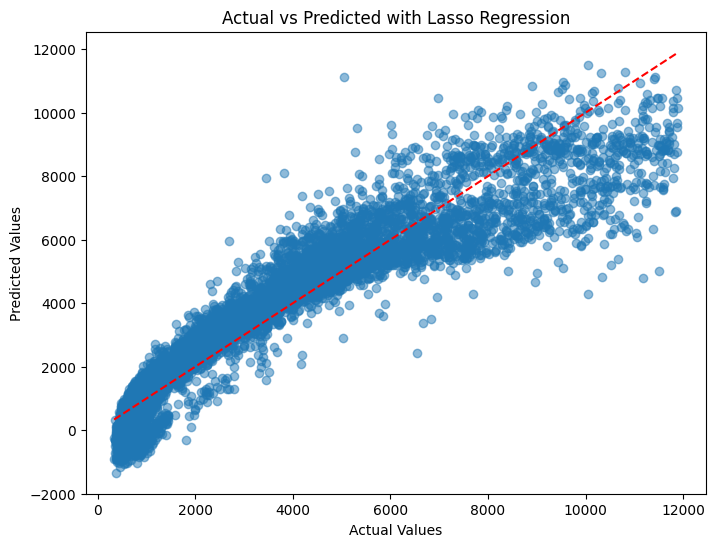

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_best_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted with Lasso Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

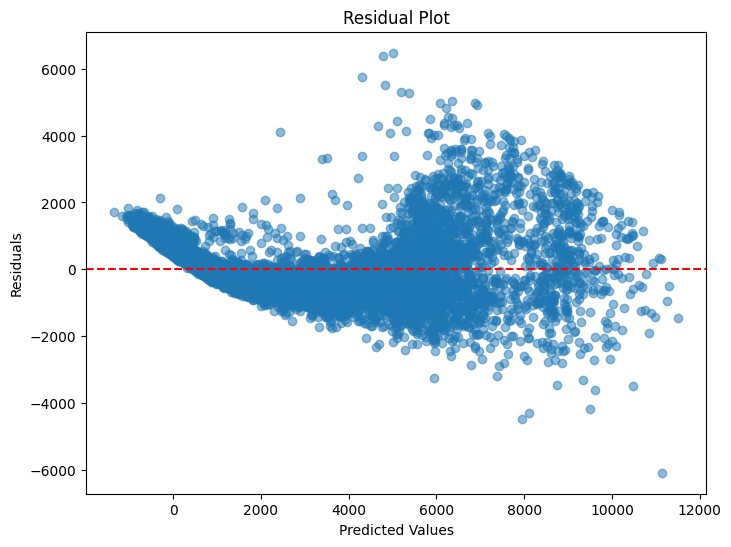

In [41]:
residuals = y_test - y_best_predict
plt.figure(figsize=(8, 6))
plt.scatter(y_best_predict, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Berdasarkan hasil di atas, dapat dilihat bahwa semakin besar nilai alpha, nilai r-squared semakin kecil. Hal ini menunjukkan bahwa semakin besar regularisasi, kualitas hasil regresi semakin buruk. Keadaan seperti ini tidak selalu terjadi, tetapi khusus untuk dataset ini, penggunaan regularisasi dengan lasso regression tidak meningkatkan kualitas regresi.

#### Soal 4: Ridge Regression

Ikuti langkah-langkah di bawah ini. **Gunakan training dan testing set yang sama dengan Linear Regression**.

a) Buatlah sebuah list alpha yang berisi minimal 5 buah alpha.

In [42]:
alpha = [1, 10, 20, 30, 40]

b) Buatlah (fit) model regresi ridge berdasarkan fitur-fitur yang terpilih di awal sebanyak nilai alpha yang telah ditentukan.

In [43]:
ridge_model = []

for a in alpha:
  ridreg = Ridge()
  ridreg.set_params(**{'alpha': a})
  ridreg.fit(X_train, y_train)
  ridge_model.append(ridreg)

c) Tampilkan nilai MAE, MSE, RMSE, dan R-squared untuk masing-masing model ridge regression pada testing set

In [44]:
from sklearn import metrics

list_mae = []
list_mse = []
list_rmse = []
list_r_squared = []

for model in ridge_model:
    y_predict = model.predict(X_test)
    
    # Menghitung nilai metrik evaluasi: MAE, MSE, RMSE, R-squared
    mae = metrics.mean_absolute_error(y_test, y_predict)
    mse = metrics.mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    r_squared = metrics.r2_score(y_test, y_predict)
    
    # Menambahkan nilai metrik evaluasi ke dalam list
    list_mae.append(mae)
    list_mse.append(mse)
    list_rmse.append(rmse)
    list_r_squared.append(r_squared)

for i, a in enumerate(alpha):
    print(f"Metrics for Ridge Regression with alpha={a}")
    print(f"R-squared: {list_r_squared[i]}")
    print(f"MAE: {list_mae[i]}")
    print(f"MSE: {list_mse[i]}")
    print(f"RMSE: {list_rmse[i]}\n")


Metrics for Ridge Regression with alpha=1
R-squared: 0.8871838756019113
MAE: 649.055063779168
MSE: 842279.0936255736
RMSE: 917.7576442752049

Metrics for Ridge Regression with alpha=10
R-squared: 0.8872076899821539
MAE: 648.2945206110638
MSE: 842101.2967484592
RMSE: 917.6607743324649

Metrics for Ridge Regression with alpha=20
R-squared: 0.887225638920733
MAE: 647.4883557912482
MSE: 841967.290942121
RMSE: 917.5877565345568

Metrics for Ridge Regression with alpha=30
R-squared: 0.8872347454993829
MAE: 646.7179304738356
MSE: 841899.3017176006
RMSE: 917.5507079816355

Metrics for Ridge Regression with alpha=40
R-squared: 0.8872351292523216
MAE: 645.9761551704341
MSE: 841896.4366388791
RMSE: 917.5491467157926



d) Pilih model terbaik berdasarkan nilai R-squared yang ditampilkan.

In [45]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

Ridge(alpha=1)

e) Tampilkan array hasil prediksi dari model regresi ridge yang terpilih pada keseluruhan data uji.

In [46]:
y_best_predict_ridge = ridge.predict(X_test)
y_best_predict_ridge

array([ 266.73014238, 5315.59109175, 6930.47738995, ..., 2241.4215209 ,
       5095.86006121, 1790.08374618])

f)  Visualisasikan kinerja model regresi ridge yang sudah dipilih sebelumnya pada keseluruhan data uji. Hint: dapat memanfaatkan visualisasi perbandingan hasil prediksi dengan aktual (Prediction Error Plot) atau dapat memanfaatkan Residuals Plot!

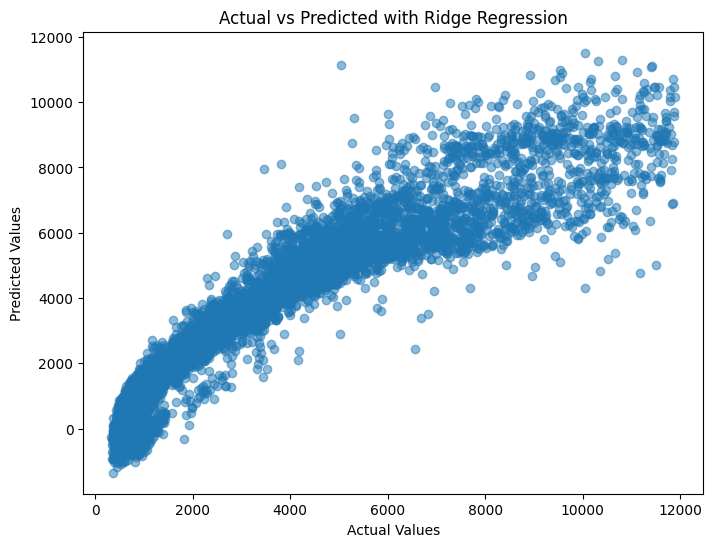

In [47]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_best_predict_ridge, alpha=0.5)
plt.title('Actual vs Predicted with Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

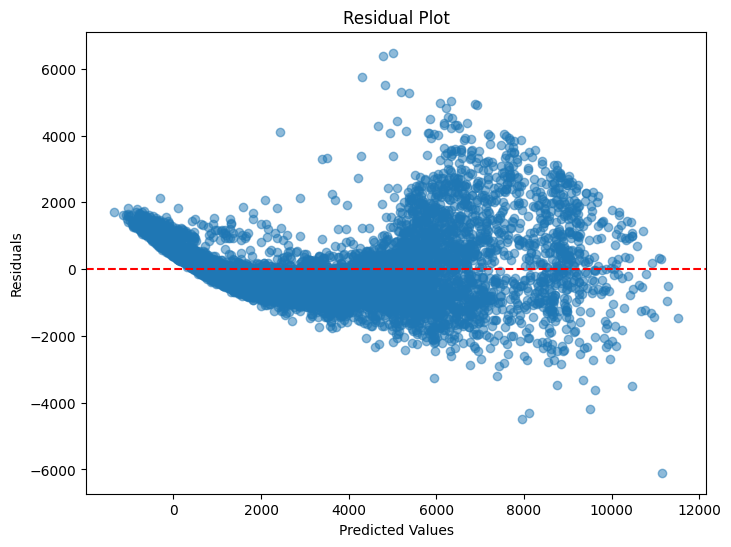

In [48]:
residuals = y_test - y_best_predict_ridge
plt.figure(figsize=(8, 6))
plt.scatter(y_best_predict_ridge, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

g) Berikan analisis hubungan perubahan nilai parameter alpha dengan kualitas hasil regresi berdasarkan nilai R-squared

Serupa dengan lasso regression, dapat dilihat bahwa semakin besar nilai alpha, nilai r-squared semakin kecil. Hal ini menunjukkan bahwa semakin besar regularisasi, kualitas hasil regresi semakin buruk. Keadaan seperti ini tidak selalu terjadi, tetapi khusus untuk dataset ini, penggunaan regularisasi dengan ridge regression tidak meningkatkan kualitas regresi.

h) Jelaskan mengapa lasso regression dapat dijadikan model untuk feature selection, sedangkan ridge regression tidak?

Lasso regression memungkinkan nilai koefisien mencapai 0 karena menggunakan fungsi lose L1. Dengan nilai koefisien 0 dapatt membuat fitur/variabel tertentu hilang maknanya sehingga fitur lain dapat terpilih. Sementara itu, ridge regression tidak memungkinkan nilai koefisien mencapai 0 karena fungsi loss L2 (dikuadratkan).

### Logistic Regression

Logistic regression adalah model linear yang hanya memiliki dua nilai output: 0 atau 1. Oleh karena itu logistic regression lebih cocok dianggap sebagai classifier daripada regressor. Contoh visualisasinya adalah sebagai berikut.

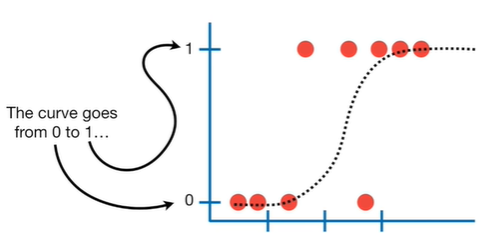

Sumber: https://youtu.be/yIYKR4sgzI8?t=222

Untuk mendapatkan kurva seperti pada gambar, berikut adalah persamaan logistic regression yang memenuhi.

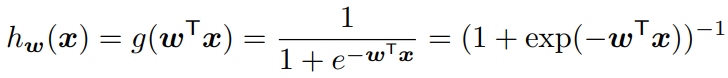

Berbeda dengan model linear, ridge, dan lasso regression yang meminimalkan fungsi loss. Pada logistic regression dilakukan proses memaksimalkan fungsi likelihood untuk menemukan parameter yang cocok dengan data.

Hal ini karena logistic regression merupakan metode klasifikasi. Sehingga, alih-alih meminimalkan perbedaan hasil prediksi, di sini memaksimalkan persamaan hasil prediksi dengan aktual.

Fungsi/persamaan likelihood dimaksimalkan melalui proses yang disebut dengan gradient ascent (tentunya bisa dipelajari sendiri dari slide :D). Berikut adalah persamaan likelihood tersebut.

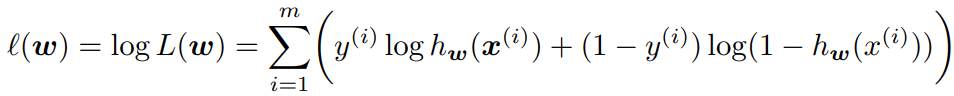

**Sumber gambar (persamaan) dan penjelasan lebih detail:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Logistic Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Logistic regression** dengan Scikit-learn

Pada bagian ini kita melatih model logistic regression menggunakan modul dari scikit-learn. Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0 atau 1.


In [49]:
# Membentuk data buatan
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 7])
x2  = np.array([3, 4, 2, 3, 5, 6, 7, 4, 3, 6])

X_train = np.stack((x1, x2), axis=1)
y_logistic_train   = np.array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1])

print('X: ', X_train)
print('y: ', y_logistic_train)

X:  [[2 3]
 [3 4]
 [2 2]
 [4 3]
 [5 5]
 [2 6]
 [1 7]
 [5 4]
 [5 3]
 [7 6]]
y:  [0 0 0 1 1 0 0 1 1 1]


In [50]:
# Melatih model logistic regression menggunakan Scikit-learn pada training set

from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_logistic_train)

LogisticRegression()

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [51]:
# Melakukan percobaan prediksi model logistic regression menggunakan data testing buatan

X_test = np.array([[2, 5], [3, 6]])
y_test = np.array([0, 1])

y_logistic_predict = logistic.predict(X_test)

print(y_logistic_predict)

[0 0]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut.

In [52]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2
logistic.intercept_, logistic.coef_
weights = [logistic.intercept_[0],logistic.coef_[0,0], logistic.coef_[0,1]]
print(weights)

[-4.475384273860629, 1.4040755856906013, -0.12235462027224119]


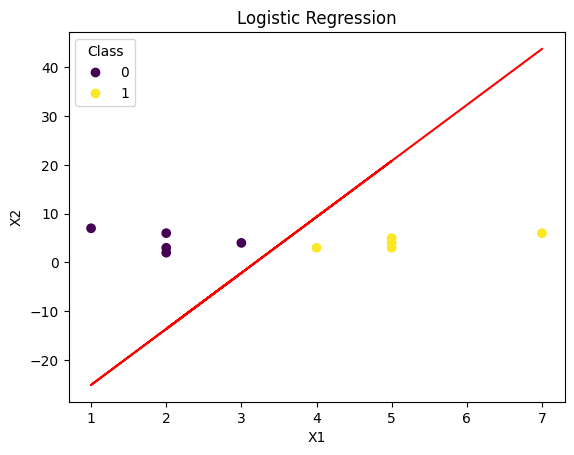

In [53]:
# Plotting the decision boundary
x2_test = (-weights[0] - (weights[1] * x1)) / weights[2]
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_logistic_train, cmap='viridis')
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2_test, color='red', label='Decision Boundary')
plt.show()

Untuk mengevaluasi performa logistic regression, tentunya berbeda dengan linear, ridge, maupun lasso regression. Hasil prediksi model logistic regression dievaluasi selayaknya model klasifikasi. Contohnya dengan akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 0.5.

In [54]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", logistic.score(X_test, y_test))

Nilai rata-rata akurasi: 0.5


### Penjelasan Dataset untuk *Logistic Regression*

Dataset yang digunakan pada bagian logistic regression adalah data terkait *diabetes*. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **gender**: jenis kelamin biologis seseorang, yang dapat berdampak pada kerentanan mereka terhadap diabetes.

- **age**: usia, berkisar antara 0-80 tahun.

- **hypertension**: hipertensi (kondisi medis di mana tekanan darah di arteri terus meningkat). 0 = tidak menderita hipertensi, sedangkan 1 = menderita hipertensi.

- **heart_disease**: penyakit jantung. 0 = tidak menderita penyakit jantung, sedangkan 1 = menderita penyakit jantung.

- **smoking_history**: riwayat merokok, ada 6 kategori yaitu: not current,former, No Info, current, never, ever.

- **bmi**: Body Mass Index (pengukuran lemak tubuh berdasarkan berat dan tinggi badan). Kisaran BMI pada dataset adalah 10,16 hingga 71,55. BMI kurang dari 18,5 berarti kurus, 18,5-24,9 normal, 25-29,9 kelebihan berat badan, dan 30 atau lebih berarti obesitas.

- **HbA1c_level**: Tingkat HbA1c (Hemoglobin A1c) ( ukuran rata-rata kadar gula darah seseorang selama 2-3 bulan terakhir)

- **blood_glucose_level**: Tingkat glukosa pada darah.

- **diabetes**: diabetes, 0 = tidak terindikasi diabetes, sedangkan 1 = terindikasi hipertensi.


**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [55]:
import pandas as pd

# Import dataset diabetes dan menampilkan 5 row teratas
df_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
df_diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,48.0,0,0,ever,27.32,6.2,145,0
1,Female,44.0,0,1,ever,31.92,6.1,100,0
2,Female,61.0,0,0,No Info,27.32,4.8,159,0
3,Female,71.0,1,0,never,23.96,4.5,85,0
4,Female,51.0,0,0,current,28.49,6.1,200,0


In [56]:
# Menampilkan informasi keseluruhan terkait dataset
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               17000 non-null  object 
 1   age                  17000 non-null  float64
 2   hypertension         17000 non-null  int64  
 3   heart_disease        17000 non-null  int64  
 4   smoking_history      17000 non-null  object 
 5   bmi                  17000 non-null  float64
 6   HbA1c_level          17000 non-null  float64
 7   blood_glucose_level  17000 non-null  int64  
 8   diabetes             17000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.2+ MB


In [57]:
# Melihat jumlah missing values
df_diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [58]:
# Melihat jumlah duplikasi data
print('Jumlah duplikasi pada data adalah', df_diabetes.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 7559


In [59]:
# Melihat jumlah duplikasi data
df_diabetes.drop_duplicates(keep='first', inplace=True)
print('Jumlah duplikasi pada data adalah', df_diabetes.duplicated(keep=False).sum())

Jumlah duplikasi pada data adalah 0


#### Soal 5: Logistic Regression

a) Lakukan encoding pada data kategorikal di dataset dan bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [60]:
# Kolom dengan data kategorikal
categorical_cols = df_diabetes.select_dtypes(include=['object', 'boolean']).columns

le = LabelEncoder()

for col in categorical_cols:
  df_diabetes[col] = le.fit_transform(df_diabetes[col])

df_diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,48.0,0,0,2,27.32,6.2,145,0
1,0,44.0,0,1,2,31.92,6.1,100,0
2,0,61.0,0,0,0,27.32,4.8,159,0
3,0,71.0,1,0,4,23.96,4.5,85,0
4,0,51.0,0,0,1,28.49,6.1,200,0
...,...,...,...,...,...,...,...,...,...
16995,0,65.0,1,1,4,33.55,8.2,140,1
16996,1,55.0,0,1,3,30.42,6.2,300,1
16997,0,61.0,0,0,0,34.45,6.5,280,1
16998,0,58.0,1,0,4,38.31,7.0,200,1


In [61]:
X = df_diabetes.drop('diabetes', axis=1)
y = df_diabetes['diabetes']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)

b) Buatlah suatu model logistic regression berdasarkan data asli serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [63]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_predict_logreg = logreg.predict(X_test)

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Confusion Matrix")
y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred = pd.Series(np.array(y_predict_logreg), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
print(df_confusion)

f1_macro = f1_score(y_test, y_predict_logreg, average='macro')
f1_micro = f1_score(y_test, y_predict_logreg, average='micro')
precision_macro = precision_score(y_test, y_predict_logreg, average='macro')
precision_micro = precision_score(y_test, y_predict_logreg, average='micro')
recall_macro = recall_score(y_test, y_predict_logreg, average='macro')
recall_micro = recall_score(y_test, y_predict_logreg, average='micro')

print("\nEvaluation Matrix")
print(f"F1 Macro Average: {f1_macro}")
print(f"F1 Micro Average: {f1_micro}")
print(f"Precision Macro Average: {precision_macro}")
print(f"Precision Micro Average: {precision_micro}")
print(f"Recall Macro Average: {recall_macro}")
print(f"Recall Micro Average: {recall_micro}")

Confusion Matrix
prediction    0     1
actual               
0           482   129
1            96  1610

Evaluation Matrix
F1 Macro Average: 0.8727266512943392
F1 Micro Average: 0.9028916702632714
Precision Macro Average: 0.8798647355299052
Precision Micro Average: 0.9028916702632714
Recall Macro Average: 0.8662993612608239
Recall Micro Average: 0.9028916702632714


c) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [65]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = [col for col in df_diabetes.columns if col not in categorical_cols and df_diabetes[col].dtype != 'object' and col != 'diabetes']

# Ambil training set dan testing set untuk kolom-kolom fitur numerik
X_train_numeric = X_train[numerical_cols]
X_test_numeric = X_test[numerical_cols]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_numeric)

# Normalisasi training set dan testing set menggunakan scaler yang sudah dilatih
X_train[numerical_cols] = scaler.transform(X_train_numeric)
X_test[numerical_cols] = scaler.transform(X_test_numeric)

d) Buatlah suatu model logistic regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [66]:
logreg_normalized = LogisticRegression(max_iter=1000) 
logreg_normalized.fit(X_train, y_train)

y_predict_normalized = logreg_normalized.predict(X_test)

In [67]:
print("Confusion Matrix (after normalization)")
y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred_norm = pd.Series(np.array(y_predict_normalized), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred_norm)
print(df_confusion)

f1_macro_normalized = f1_score(y_test, y_predict_normalized, average='macro')
f1_micro_normalized = f1_score(y_test, y_predict_normalized, average='micro')
precision_macro_normalized = precision_score(y_test, y_predict_normalized, average='macro')
precision_micro_normalized = precision_score(y_test, y_predict_normalized, average='micro')
recall_macro_normalized = recall_score(y_test, y_predict_normalized, average='macro')
recall_micro_normalized = recall_score(y_test, y_predict_normalized, average='micro')

print("\nEvaluasi Matrix (after normalization)")
print(f"F1 Macro Average: {f1_macro_normalized}")
print(f"F1 Micro Average: {f1_micro_normalized}")
print(f"Precision Macro Average: {precision_macro_normalized}")
print(f"Precision Micro Average: {precision_micro_normalized}")
print(f"Recall Macro Average: {recall_macro_normalized}")
print(f"Recall Micro Average: {recall_micro_normalized}")

Confusion Matrix (after normalization)
prediction    0     1
actual               
0           475   136
1            94  1612

Evaluasi Matrix (after normalization)
F1 Macro Average: 0.869247642134396
F1 Micro Average: 0.9007337073802331
Precision Macro Average: 0.8784973436877899
Precision Micro Average: 0.9007337073802331
Recall Macro Average: 0.8611572134931492
Recall Micro Average: 0.9007337073802331


e) Dari kedua model yang dibangun dengan data yang di normalisasi dan data yang tidak dinormalisasi, manakah yang memberikan performa terbaik? berikan analisis mengenai hal tersebut.

Performa terbaik didapatkan dengan data yang tidak dinorrmalisasi. Terlihat dari nilai F1 sebelum dinormalisasi lebih besar dibandingkan nilai F1 setelah normalisasi. Hal ini dapat disebabkan karena normalisasi mengurangi skala fitur yang memiliki variabilitas tinggi. Sementara itu, data yang digunakan sudah memiliki distribusi fitur yang seragam sehingga alogoritma yang digunakan tidak terlalu sensitif terhadap skala fitur.

### Softmax Regression

Softmax regression adalah model yang merupakan modifikasi dari logistic regression. Pada model ini, output dapat memiliki nilai lebih dari dua buah. Sehingga, softmax regression disebut sebagai multiclass classification.

Persamaan softmaxe regression:

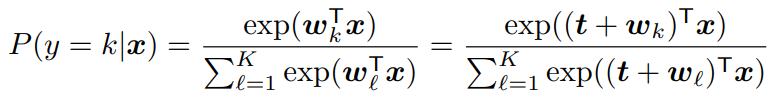

Persamaan likelihood softmaxe regression:

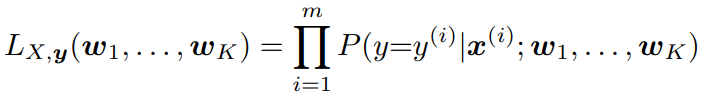

Proses memaksimalkan persamaan likelihood juga sama seperti pada logistic regression, yaitu dengan gradient ascent.

**Sumber gambar:** Slide kuliah "Linear Models for Regression and Classification" oleh Pak Adila A. Krisnadhi.

Untuk implementasi Softmax Regression menggunakan **sklearn** lebih lanjutnya dapat dilihat pada link [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Softmax regression dengan Scikit-learn**

Pada bagian ini kita melatih model softmax regression menggunakan modul dari scikit-learn. Softmax regression pada scikit-learn terdapat pada modul logistic regression dengan pengaturan hyperparameter 'multi_class' menjadi 'multinominal'.

Kita dapat membentuk data buatan sederhana dan melihat decision boundary yang dihasilkan. Kali ini target hanya berisi nilai 0, 1, dan 2.

In [68]:
# Membentuk data buatan
x1  = np.array([2, 3, 2, 4, 5, 2, 1, 5, 5, 7])
x2  = np.array([3, 6, 2, 3, 5, 6, 3, 4, 3, 6])

X_train = np.stack((x1, x2), axis=1)
y_softmax_train   = np.array([0, 1, 0, 2, 2, 1, 0, 2, 2, 2])

print('X: ', X_train)
print('y: ', y_softmax_train)

X:  [[2 3]
 [3 6]
 [2 2]
 [4 3]
 [5 5]
 [2 6]
 [1 3]
 [5 4]
 [5 3]
 [7 6]]
y:  [0 1 0 2 2 1 0 2 2 2]


In [69]:
# Melatih model softmax regression menggunakan Scikit-learn pada training set

softmax = LogisticRegression(multi_class='multinomial')
softmax.fit(X_train, y_softmax_train)

LogisticRegression(multi_class='multinomial')

Selanjutnya, mari kita coba memprediksi nilai target dari data yang baru.

In [70]:
# Melakukan percobaan prediksi model softmax regression menggunakan data testing buatan

X_test = np.array([[2, 3], [7, 5]])
y_softmax_test = np.array([0, 2])

y_logistic_predict = softmax.predict(X_test)

print(y_logistic_predict)

[0 2]


Selanjutnya, kita dapat melihat decision boundary yang dihasilkan oleh model tersebut. w0, w1, dan w2 yang dihasilkan masing-masing memiliki 3 nilai yang merepresentasikan tiap boundary.

In [71]:
# Mendapatkan intercept dan koefisien sebagai w0, w1, dan w2.
softmax.intercept_, softmax.coef_
print(softmax.intercept_, softmax.coef_)

[ 4.69333009 -2.77478855 -1.91854154] [[-0.7077521  -0.62923839]
 [-0.31769488  0.84892058]
 [ 1.02544698 -0.21968219]]


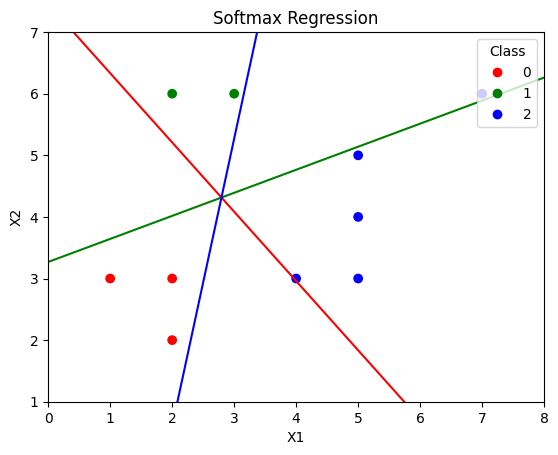

In [72]:
# Plotting the decision boundary
import matplotlib

x1_line = np.array([x1.min() - 1, x1.max() + 1])
boundary_0 = (-softmax.intercept_[0] - (softmax.coef_[0][0] * x1_line)) / softmax.coef_[0][1]
boundary_1 = (-softmax.intercept_[1] - (softmax.coef_[1][0] * x1_line)) / softmax.coef_[1][1]
boundary_2 = (-softmax.intercept_[2] - (softmax.coef_[2][0] * x1_line)) / softmax.coef_[2][1]

fig, ax = plt.subplots()
plt.title('Softmax Regression')
plt.xlabel('X1')
plt.ylabel('X2')
scatter = plt.scatter(x1, x2, c=y_softmax_train, cmap=matplotlib.colors.ListedColormap(["red", "green", "blue"]))
plt.legend(*scatter.legend_elements(),
           loc = 'upper right',
           title = 'Class')
plt.plot(x1_line, boundary_0, color='red')
plt.plot(x1_line, boundary_1, color='green')
plt.plot(x1_line, boundary_2, color='blue')
ax.set_xlim([x1.min() - 1, x1.max() + 1])
ax.set_ylim([x2.min() - 1, x2.max() + 1])
plt.show()

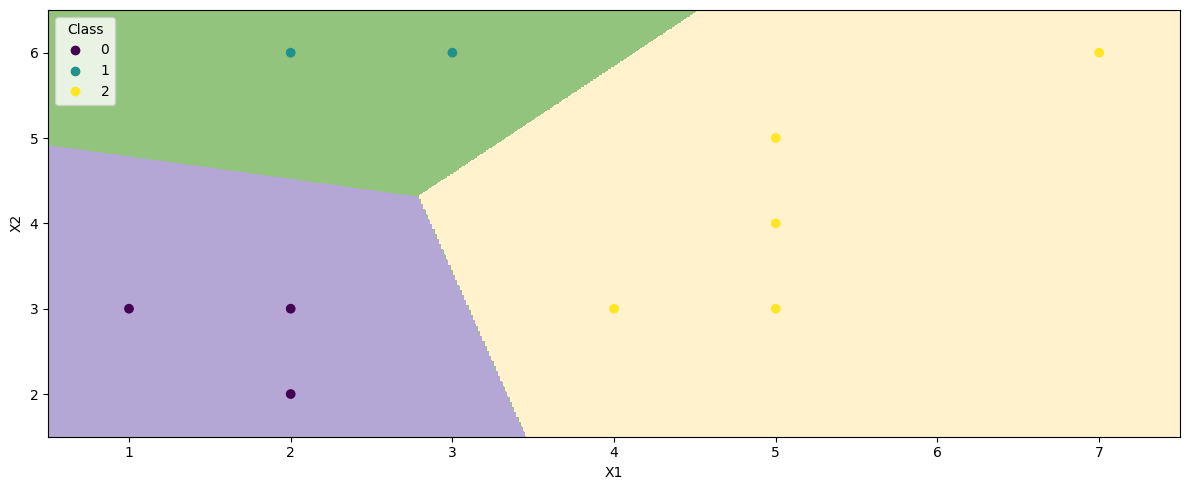

In [73]:
# Plotting the decision boundary using contour plot
x1_mesh, x2_mesh = np.meshgrid(
    np.linspace(x1.min() - 0.5, x1.max() + 0.5, 500).reshape(-1, 1),
    np.linspace(x2.min() - 0.5, x2.max() + 0.5, 500).reshape(-1, 1)
)

X_new = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]
y_pred = softmax.predict(X_new)
zz = y_pred.reshape(x1_mesh.shape)

plt.figure(figsize=(12, 5))
plt.contourf(x1_mesh, x2_mesh, zz, cmap=matplotlib.colors.ListedColormap(['#b4a7d6','#93c47d','#fff2cc']))
scatter = plt.scatter(x1, x2, c=y_softmax_train)
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.xlabel('X1')
plt.ylabel('X2')

plt.tight_layout()
plt.show()

Performa model softmax regression dievaluasi sama dengan logistic regression, selayaknya classifier. Contohnya adalah akurasi.

Melihat hasil prediksi di atas, kita dapat tahu bahwa model hanya berhasil memprediksi benar sebanyak satu saja. Oleh karena itu, nilai akurasi model logistic regression yang telah kita latih adalah sebesar 1.

In [74]:
# Menampilkan rata-rata akurasi
print("Nilai rata-rata akurasi:", softmax.score(X_test, y_softmax_test))

Nilai rata-rata akurasi: 1.0


### Penjelasan Dataset untuk *Softmax Regression*

Dataset yang digunakan pada bagian softmax regression adalah data terkait gambar dari dry beans. Data didapatkan dari Kaggle dengan beberapa perubahan. Berikut penjelasan masing-masing kolom pada data.

- **Area (A)**: Luas zona kacang dan jumlah piksel dalam batasnya.

- **Perimeter (P)**: Keliling kacang didefinisikan sebagai panjang tepinya.

- **Major axis length (L)**: jarak antara ujung-ujung garis terpanjang yang dapat ditarik dari kacang.

- **Minor axis length (l)**: Garis terpanjang yang dapat ditarik dari kacang sambil berdiri tegak lurus terhadap sumbu utama.

- **Aspect ratio (K)**: Mendefinisikan hubungan antara L dan l.

- **Eccentricity (Ec)**: Eksentrisitas elips yang momennya sama dengan daerah.

- **Convex area (C)**: Jumlah piksel dalam poligon cembung terkecil yang dapat memuat luas biji kacang.

- **Equivalent diameter (Ed)**: Diameter lingkaran yang luasnya sama dengan luas biji kacang.

- **Extent (Ex)**: Rasio piksel dalam kotak pembatas pada area kacang.

- **Solidity (S)**: Soliditas juga dikenal sebagai konveksitas, yaitu rasio piksel pada cangkang cembung dengan piksel pada kacang.

- **Roundness (R)**: Dihitung dengan rumus  (4*pi*A)/(P^2) dengan A adalah Area dan P adalah perimeter

- **Compactness (CO)**: Mengukur kebulatan suatu benda

- **ShapeFactor1 (SF1)**: Ukuran kacang

- **ShapeFactor2 (SF2)**: Ukuran kacang

- **ShapeFactor3 (SF3)**: Ukuran kacang

- **ShapeFactor4 (SF4)**: Ukuran kacang

- **Class**: Jenis Kacang, (0 = Seker, 1 = Barbunya, 2 = Bombay, 3 = Cali, 4 = Dermason, 5 = Horoz, dan 6 = Sira)

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/whenamancodes/dry-beans-dataset
<br/> <br/>
<img src="https://storage.googleapis.com/kaggle-datasets-images/2048855/3398802/f484410f3cfb3f7f49d1216f57f18850/dataset-cover.jpg?t=2022-04-02-23-21-35" alt="Seker Dry Beans" width=300/>


In [75]:
import pandas as pd

# Import dataset dry beans dan menampilkan 5 row teratas
df_beans = pd.read_csv('dry_beans_dataset.csv')

# Melakukan encoding pada tiap label
df_beans["Class"] = df_beans["Class"].map({
    "SEKER": 0,
    "BARBUNYA": 1,
    "BOMBAY": 2,
    "CALI": 3,
    "DERMASON": 4,
    "HOROZ": 5,
    "SIRA": 6
})

df_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0


In [76]:
# Menampilkan informasi keseluruhan terkait dataset
df_beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  int64  
dtypes: float64(1

#### Soal 6: Softmax Regression

a) Bagi dataset menjadi training dan testing dengan ukuran 80% training dan 20% testing.

In [77]:
X = df_beans.drop('Class', axis=1)
y = df_beans['Class']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)

b) Lakukan normalisasi pada kolom-kolom fitur selain kolom kategorikal. Latih terlebih dahulu scaler menggunakan training set, lalu scale untuk kedua training dan testing set

In [79]:
from sklearn.preprocessing import StandardScaler

num_cols = ['Area',
            'Perimeter',
            'MajorAxisLength',
            'MinorAxisLength',
            'AspectRation',
            'Eccentricity',
            'ConvexArea',
            'EquivDiameter',
            'Extent',
            'Solidity',
            'roundness',
            'Compactness',
            'ShapeFactor1',
            'ShapeFactor2',
            'ShapeFactor3',
            'ShapeFactor4']

scaler = StandardScaler()
scaler.fit(X_train[num_cols])

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

c) Buatlah suatu model softmax regression berdasarkan data yang telah dinormalisasi serta tampilkan `confusion matrix` dan `hasil evaluasi metriknya` pada testing set.

> Catatan: Jika menemukan warning `ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT`, atur parameter max_iter pada LogisticRegression untuk menambah banyak iterasi agar algoritma dapat melakukan proses konvergensi dengan baik.

>`hasil evaluasi metriknya` mencakup:
* F1 Macro Average,
* F1 Micro Average,
* Precision Macro Average
* Precision Micro Average
* Recall Macro Average
* Recall Micro Average

In [80]:
# Membangun model
sofreg = LogisticRegression(multi_class='multinomial', max_iter=1000)
sofreg.fit(X_train, y_train)

y_sofreg_predict = sofreg.predict(X_test)

In [81]:
y_actual = pd.Series(np.array(y_test), name = "actual")
y_pred = pd.Series(np.array(y_sofreg_predict), name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)

print("Confussion Matrix")
print(df_confusion)

print("\nEvaluation Matrix")
print('F1 Macro Average:', f1_score(y_test, y_pred, average='macro'))
print('F1 Micro Average:', f1_score(y_test, y_pred, average='micro'))
print('Precision Macro Average:', precision_score(y_test, y_pred, average='macro',zero_division=0))
print('Precision Micro Average:', precision_score(y_test, y_pred, average='micro',zero_division=0))
print('Recall Macro Average:', recall_score(y_test, y_pred, average='macro',zero_division=0))
print('Recall Micro Average:', recall_score(y_test, y_pred, average='micro',zero_division=0))
print()

Confussion Matrix
prediction    0    1    2    3    4    5    6
actual                                       
0           383   10    0    0    4    0    8
1             4  231    0   16    0    0    8
2             0    0  107    0    0    0    0
3             2    9    0  306    0    8    4
4            13    1    0    0  668    0   39
5             0    2    0    2    6  375    9
6             3    0    0    0   50    3  452

Evaluation Matrix
F1 Macro Average: 0.9354523860544965
F1 Micro Average: 0.9261843554902681
Precision Macro Average: 0.9373546732196792
Precision Micro Average: 0.9261843554902681
Recall Macro Average: 0.9336705005235812
Recall Micro Average: 0.9261843554902681



d) Berikan analisis mengenai perbedaan antara regresi softmax dengan regresi logistik.

Logistic regression lebih cocok untuk klasifikasi biner, dimana pada kasus kali ini kita menggunakan dataset diabets dengan expected value 0 dan 1. Sementara itu, softmax regression cocok untuk klasifikasi multiclass, seperti yang terjadi pada dataset beans.

## Kompetisi Kaggle Regresi Berdasarkan Linear Models

Dalam rangka menerapkan pemahaman kalian pada materi model linear untuk kasus regresi serta sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 6 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Linear Model for Regression](https://www.kaggle.com/t/09051471139246639e739754ced8691a)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.

In [179]:
df_emission_train = pd.read_csv('co2_emissions_train.csv')
df_emission_train.shape

(5908, 13)

In [180]:
df_emission_test = pd.read_csv('co2_emissions_test.csv')
df_emission_test.shape

(1477, 12)

In [181]:
df_emission_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5908 entries, 0 to 5907
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                5908 non-null   int64  
 1   Make                              5908 non-null   object 
 2   Model                             5908 non-null   object 
 3   Vehicle Class                     5908 non-null   object 
 4   Engine Size(L)                    5908 non-null   float64
 5   Cylinders                         5908 non-null   int64  
 6   Transmission                      5908 non-null   object 
 7   Fuel Type                         5908 non-null   object 
 8   Fuel Consumption City (L/100 km)  5908 non-null   float64
 9   Fuel Consumption Hwy (L/100 km)   5908 non-null   float64
 10  Fuel Consumption Comb (L/100 km)  5908 non-null   float64
 11  Fuel Consumption Comb (mpg)       5908 non-null   int64  
 12  CO2 Em

In [182]:
le = LabelEncoder()

disc_cols = df_emission_train.select_dtypes(include='object').columns

for col in disc_cols:
  df_emission_train[col] = le.fit_transform(df_emission_train[col])
  df_emission_test[col] = le.fit_transform(df_emission_test[col])
df_emission_train

,Id,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions
0,6125,27,557,11,2.5,4,15,3,9.7,7.8,8.8,32,206
1,725,28,361,9,2.0,4,16,4,9.2,6.6,8.0,35,184
2,967,38,1886,11,2.0,4,19,3,9.5,7.2,8.5,33,196
3,1107,3,233,2,3.0,6,17,0,9.8,6.2,8.1,35,217
4,290,10,46,1,6.4,8,2,4,16.7,10.3,13.8,20,317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,4030,27,1147,2,2.5,4,15,3,9.0,6.7,7.8,36,183
5904,2940,27,551,0,2.0,4,15,3,8.2,6.7,7.6,37,179
5905,1334,9,1138,2,2.5,4,15,3,9.3,6.4,8.0,35,184
5906,1579,16,829,9,1.5,4,19,3,7.0,5.7,6.4,44,147


In [183]:
X_em = df_emission_train.drop('CO2 Emissions', axis=1)
y_em = df_emission_train['CO2 Emissions']

In [184]:
X_em_train, X_em_test, y_em_train, y_em_test = train_test_split(X_em, y_em, test_size=0.25, random_state=123)

In [185]:
linear_reg = Lasso(alpha=0.5)
linear_reg.fit(X_em_train, y_em_train)

Lasso(alpha=0.5)

In [186]:
df_emission_test['Id'].shape

(1477,)

In [187]:
res = linear_reg.predict(df_emission_test)
res.shape

(1477,)

In [188]:
output = pd.DataFrame({'Id': df_emission_test['Id'], 'CO2 Emissions': res})
output.to_csv('submission-v11.csv', index=False)